In [1]:
#meteogram.py
#By; Elliott Budd
#10/6/2020
#I have never given or recieved nor have I tolerated others use of unauthorized aid
#recieved help from Matteo during wxcenter tutoring

In [2]:
#import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
#input date and station
station=input('Input station id: ')
date=input('Input date in YYYMMDD format: ')

dt=datetime.strptime(date, '%Y%m%d')
print(dt)

Input station id ORD
Input date in YYYMMDD format 20140312


2014-03-12 00:00:00


In [4]:
#set up time data
date1=dt-timedelta(minutes=10)
date2=dt+timedelta(hours=24)-timedelta(minutes=10)

In [5]:
#read in a and print out data in more readable and aesthetic format

data=pd.read_csv(f'{station}.txt', usecols=[0,1,4,5,7,8,9,10], index_col=1, parse_dates=True)
print(data)

#print(date1)
#print(date2)

                    station   tmpf   dwpf   drct  sknt  p01i   alti
valid                                                              
2014-03-11 00:51:00     ORD  46.94  35.96  250.0   6.0   0.0  29.68
2014-03-11 01:51:00     ORD  44.06  35.06  260.0   5.0   0.0  29.67
2014-03-11 02:51:00     ORD  44.06  35.06  260.0   6.0   0.0  29.67
2014-03-11 03:51:00     ORD  44.06  35.06  260.0   3.0   0.0  29.67
2014-03-11 04:51:00     ORD  42.08  35.06  280.0   4.0   0.0  29.66
...                     ...    ...    ...    ...   ...   ...    ...
2014-03-13 19:51:00     ORD  30.92  21.02  190.0  16.0   0.0  29.96
2014-03-13 20:51:00     ORD  33.08  23.00  180.0  16.0   0.0  29.93
2014-03-13 21:51:00     ORD  33.98  24.08  210.0  17.0   0.0  29.94
2014-03-13 22:51:00     ORD  35.06  24.08  210.0  18.0   0.0  29.92
2014-03-13 23:51:00     ORD  33.98  26.06  210.0  13.0   0.0  29.91

[72 rows x 7 columns]


/anaconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


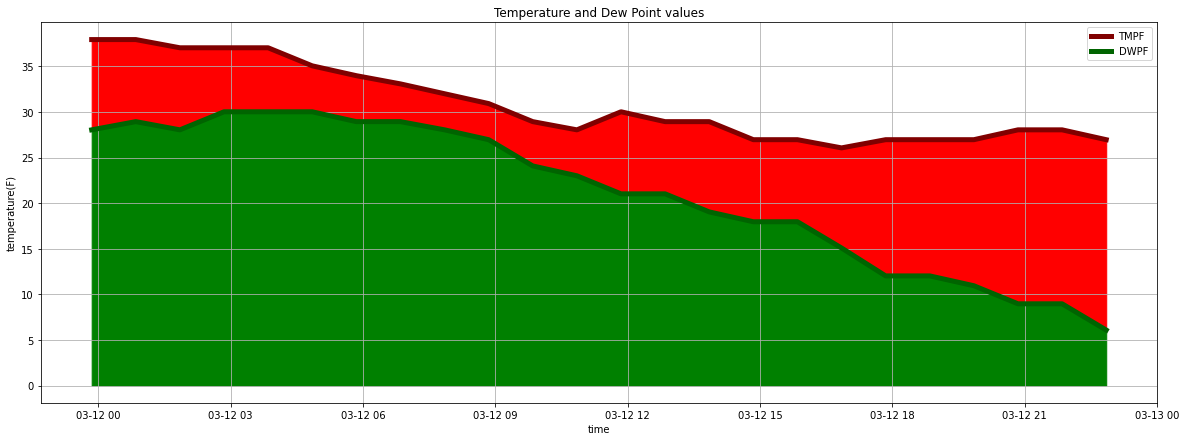

In [6]:
#generate temp/dew point meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].tmpf, color ='maroon', linewidth=5, label = 'TMPF')
plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].dwpf, color ='darkgreen', linewidth=5, label = 'DWPF')

plt.xlabel('time')
plt.ylabel('temperature(F)')

plt.fill_between(data.loc[date1:date2].index, data.loc[date1:date2].tmpf, data.loc[date1:date2].dwpf,  color ='red')
plt.fill_between(data.loc[date1:date2].index,data.loc[date1:date2].dwpf,0,color='green')
                 
plt.legend()
plt.title('Temperature and Dew Point values')
plt.grid()
plt.show()

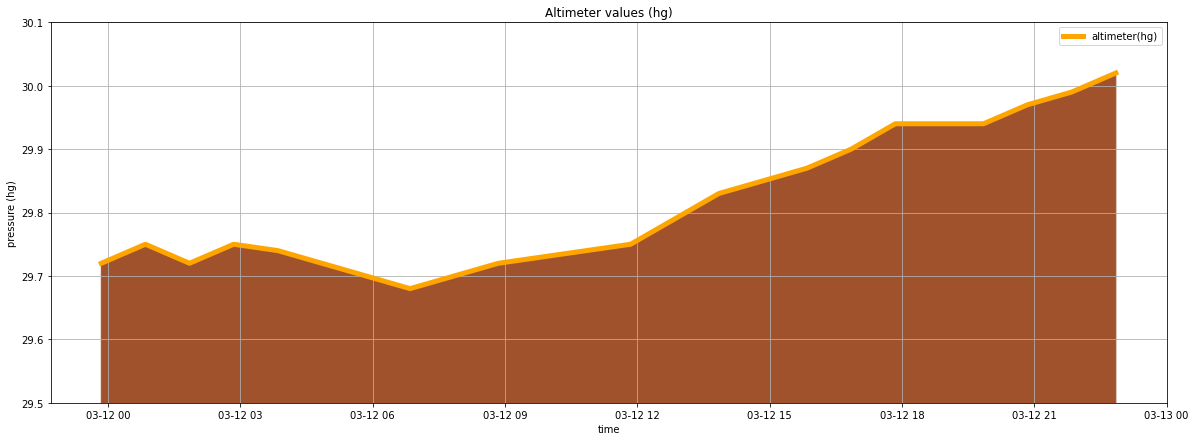

In [7]:
#generate altimeter meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].alti, color ='orange', linewidth=5, label = 'altimeter(hg)')
plt.fill_between(data.loc[date1:date2].index,data.loc[date1:date2].alti,0,color='sienna')

plt.ylim(29.5, 30.1)
plt.xlabel('time')
plt.ylabel('pressure (hg)')

plt.legend()
plt.title('Altimeter values (hg)')
plt.grid()
plt.show()



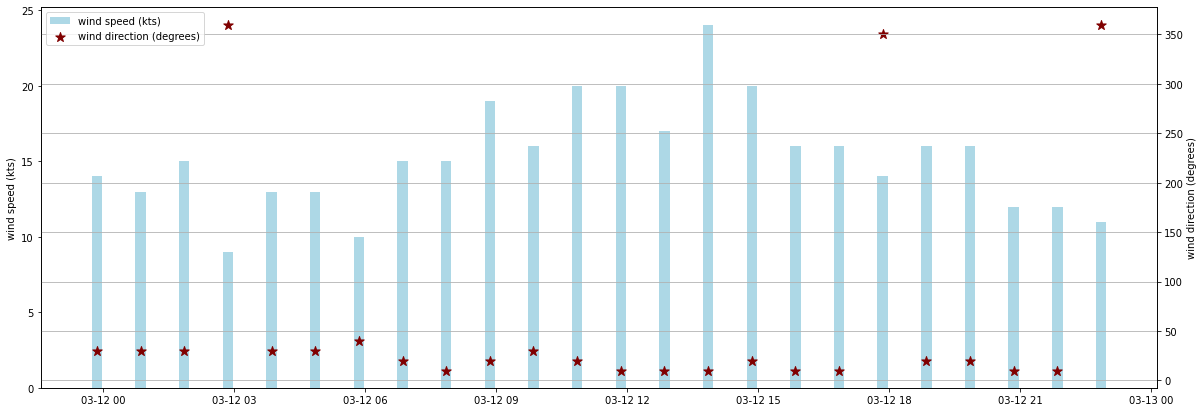

In [8]:
#generate wind meteogram

plt.figure(3,figsize=(20,7))

plt1=plt.subplot()

b1=plt1.bar(data.loc[date1:date2].index, data.loc[date1:date2].sknt, color='lightblue', label = 'Wind speed (knt)', align ='center', width=0.01)

plt2=plt1.twinx()

s1=plt2.scatter(data.loc[date1:date2].index, data.loc[date1:date2].drct, s=100, color='maroon', marker='*', label = 'wind direction (degrees)') 

plt1.set_ylabel('wind speed (kts)')
plt2.set_ylabel('wind direction (degrees)')

plt.legend([b1,s1],['wind speed (kts)', 'wind direction (degrees)'])
plt.grid()
plt.show()


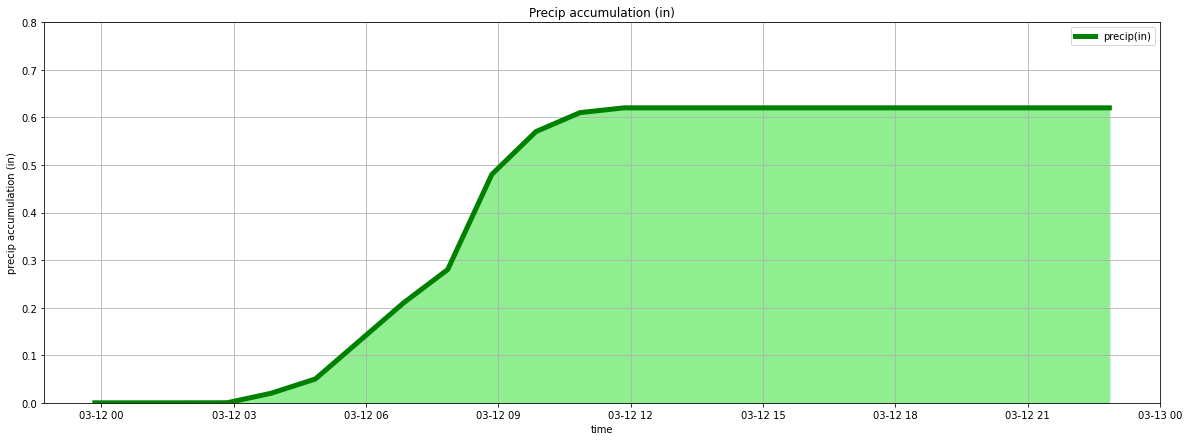

In [9]:
#generate precip meteogram

plt.figure(1,figsize = (20,7))

plt.plot(data.loc[date1:date2].index, np.cumsum(data.loc[date1:date2].p01i), color ='green', linewidth=5, label = 'precip(in)')
plt.fill_between(data.loc[date1:date2].index, np.cumsum(data.loc[date1:date2].p01i),0,color='lightgreen')


plt.ylim(0,0.8)
plt.xlabel('time')
plt.ylabel('precip accumulation (in)')

plt.legend()
plt.title('Precip accumulation (in)')
plt.grid()
plt.show()

In [10]:
#temperature stats
print(f'Daily Statistics for {station} on {dt}')
print()
print('Statistics for Temperature')

max=np.max(data.loc[date1:date2].tmpf)
time_max=np.where(data.loc[date1:date2].tmpf==max)[0][0]
where_max=(data.loc[date1:date2].tmpf.index[time_max])

min=np.min(data.loc[date1:date2].tmpf)
time_min=np.where(data.loc[date1:date2].tmpf==min)[0][0]
where_min=(data.loc[date1:date2].tmpf.index[time_min])

tmpf_avr=np.average(data.loc[date1:date2].tmpf)

print(f'Max temp: {max} F at {where_max}')
print(f'Min temp: {min} F at {where_min}')
print(f'Average temp: {tmpf_avr} F ')


Daily Statistics for ORD on 2014-03-12 00:00:00

Statistics for Temperature
Max temp: 37.94 F at 2014-03-11 23:51:00
Min temp: 26.06 F at 2014-03-12 16:51:00
Average temp: 30.867499999999996 F 


In [11]:
#dew point stats

print('Statistics for dew point')
max=np.max(data.loc[date1:date2].dwpf)
time_max=np.where(data.loc[date1:date2].dwpf==max)[0][0]
where_max=(data.loc[date1:date2].dwpf.index[time_max])

min=np.min(data.loc[date1:date2].dwpf)
time_min=np.where(data.loc[date1:date2].dwpf==min)[0][0]
where_min=(data.loc[date1:date2].dwpf.index[time_min])

dwpf_avr=np.average(data.loc[date1:date2].dwpf)

print(f'Max dew point: {max} F at {where_max}')
print(f'Min dew point: {min} F at {where_min}')
print(f'Average dew point: {dwpf_avr} F ')


Statistics for dew point
Max dew point: 30.02 F at 2014-03-12 02:51:00
Min dew point: 6.08 F at 2014-03-12 22:51:00
Average dew point: 21.087500000000002 F 


In [12]:
# #altimeter stats
print('Statistics for altimeter')

max=np.max(data.loc[date1:date2].alti)
time_max=np.where(data.loc[date1:date2].alti==max)[0][0]
where_max=(data.loc[date1:date2].alti.index[time_max])

min=np.min(data.loc[date1:date2].alti)
time_min=np.where(data.loc[date1:date2].alti==min)[0][0]
where_min=(data.loc[date1:date2].alti.index[time_min])

alti_avr=np.average(data.loc[date1:date2].alti)

print(f'Max pressure: {max} Hg at {where_max}')
print(f'Min pressure: {min} hg at {where_min}')
print(f'Average pressure: {alti_avr} Hg ')

Statistics for altimeter
Max pressure: 30.02 Hg at 2014-03-12 22:51:00
Min pressure: 29.68 hg at 2014-03-12 06:51:00
Average pressure: 29.810833333333335 Hg 


In [13]:
#wind stats
print('Statistics for wind')

max=np.max(data.loc[date1:date2].sknt)
time_max=np.where(data.loc[date1:date2].sknt==max)[0][0]
where_max=(data.loc[date1:date2].sknt.index[time_max])
dir_max=(data.loc[where_max].drct)

min=np.min(data.loc[date1:date2].sknt)
time_min=np.where(data.loc[date1:date2].sknt==min)[0][0]
where_min=(data.loc[date1:date2].sknt.index[time_min])
dir_min=(data.loc[where_min].drct)

sknt_avr=np.average(data.loc[date1:date2].sknt)
print(f'max: {max} kts at {where_max}')
print(f'max wind from {dir_max} deg')
print(f'min: {min} kts at {where_min}')
print(f'min wind from {dir_min} deg')
print(f'average: {sknt_avr} kts')

Statistics for wind
max: 24.0 kts at 2014-03-12 13:51:00
max wind from 10.0 deg
min: 9.0 kts at 2014-03-12 02:51:00
min wind from 360.0 deg
average: 15.25 kts


In [17]:
#precip stats
print('Statistics for precip')

sum_precip=np.sum(data.loc[date1:date2].p01i)
print(f'Precipitation Accumulation: {sum_precip} in')

tmpf_less_32=data.loc[date1:date2].tmpf<32
tmpf_more_32=data.loc[date1:date2].tmpf>32
#data.loc[date1:date2].tmpf[tmpf_less_32].count()
#data.loc[date1:date2].tmpf[tmpf_more_32].count()

print(f'number of hours under 32 F: {data.loc[date1:date2].tmpf[tmpf_less_32].count()}')
print(f'number of hours over 32 F: {data.loc[date1:date2].tmpf[tmpf_more_32].count()}')


Statistics for precip
Precipitation Accumulation: 0.6201 in
number of hours under 32 F: 15
number of hours over 32 F: 8


In [15]:
#generate altimeter meteogram converted to mb for the fun of it

# plt.figure(1,figsize = (20,6))

# plt.plot(data.loc[date1:date2].index, data.loc[date1:date2].alti*(33.8639), color ='orange', linewidth=5, label = 'MSLP(mb)')
# plt.fill_between(data.loc[date1:date2].index,data.loc[date1:date2].alti*(33.8639),0,color='sienna')

# plt.ylim(1003,1017)
# plt.xlabel('time')
# plt.ylabel('pressure (mb)')

# plt.legend()
# plt.title('Pressure (mb)')
# plt.grid()
# plt.show()
